## Day 22 Movement

### Data

- 

In [2]:
import pandas as pd
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
from geoviews import opts, tile_sources as gvts
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from colorcet import palette
import geopandas as gpd

import datashader as ds
import datashader.transfer_functions as tf

from functools import partial

from datashader.bundling import connect_edges, hammer_bundle
from datashader.utils import export_image
from datashader.colors import colormap_select, Hot, viridis

# from holoviews.operation.datashader import datashade, directly_connect_edges
# hv.extension('bokeh')
# hv.extension('matplotlib')
# hv.output(fig='png', size=300)

gv.extension('matplotlib')
gv.output(fig='png', size=300)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [3]:
kant_movement_copy = gpd.read_file(r"C:\dev\05_geodata\qgis_map_projects\30daysmapschallenge_alex\22_movement\movement\kant_movement.shp")

territorialCommunities2018 = gpd.read_file(r"C:\dev\05_geodata\qgis_map_projects\30daysmapschallenge_alex\22_movement\movement\territorialCommunities2018.shp")

In [4]:
kant_movement_copy.crs

<Projected CRS: EPSG:3301>
Name: Estonian Coordinate System of 1997
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Estonia
- bounds: (20.37, 57.52, 28.2, 60.0)
Coordinate Operation:
- name: Estonian National Grid
- method: Lambert Conic Conformal (2SP)
Datum: Estonia 1997
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [5]:
territorialCommunities2018_p = territorialCommunities2018.to_crs(kant_movement_copy.crs)

In [6]:
territorialCommunities2018_p.dtypes

OBJECTI      float64
KANT_nk       object
knt_ppS        int64
KOOD          object
VID          float64
NIMI          object
asst_pS        int64
geometry    geometry
dtype: object

<AxesSubplot:>

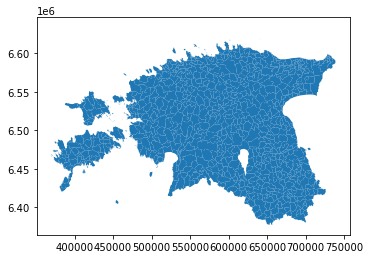

In [7]:
territorialCommunities2018_p.plot()

In [8]:
territorialCommunities2018_p['centroid'] = territorialCommunities2018_p.centroid

<AxesSubplot:>

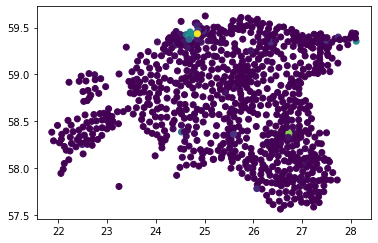

In [9]:
com_poi = gpd.GeoDataFrame(territorialCommunities2018_p.drop(columns=['geometry']).rename(columns={'centroid':'geometry'}), geometry='geometry', crs=territorialCommunities2018_p.crs).to_crs(4326)
com_poi.plot(column='knt_ppS')

C:\dev\conda3\envs\geopy2020\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\dev\conda3\envs\geopy2020\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


:Points   [Longitude,Latitude]   (knt_ppS,newid)
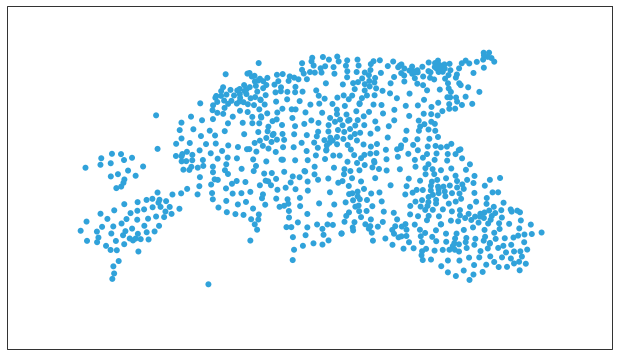

In [30]:
com_poi['newid'] = com_poi['OBJECTI'].astype(np.int64)
settlements_units_p = gv.Points( com_poi, vdims=['knt_ppS', 'newid'])

settlements_units_p.opts( projection=ccrs.LambertAzimuthalEqualArea() )

In [31]:
kant_movement_copy.dtypes

routes = kant_movement_copy[['start_kant','end_kant_i', 'route_id']]

In [33]:
routes.head(5)

start_kant  end_kant_i  route_id
0           1           1      1697
1           1          49     41506
2           1          50     42353
3           1          82     69457
4           1          89     75386

In [34]:
com_poi = com_poi.set_index('newid')
com_poi.head(5)

OBJECTI             KANT_nk  knt_ppS  KOOD         VID  \
newid                                                           
1          1.0         Aakre Valga      470  1018  41131229.0   
2          2.0        Aardla Tartu     1087  1696  41130677.0   
3          3.0         Aarna Põlva      243  1027  41131065.0   
4          4.0  Aaspere Lääne-Viru      441  1032  41131007.0   
5          5.0   Abja-Paluoja linn     1057  1060  41130799.0   

                    NIMI  asst_pS                   geometry     cent_x  \
newid                                                                     
1             Aakre küla      267  POINT (26.15681 58.08466)  26.156806   
2          Haaslava küla      378  POINT (26.80173 58.30537)  26.801733   
3             Aarna küla      243  POINT (26.96627 58.08171)  26.966269   
4           Aaspere küla      233  POINT (26.13077 59.45268)  26.130767   
5      Abja-Paluoja linn     1057  POINT (25.35356 58.13004)  25.353558   

          cent_y  
newid             
1      58.084658  
2      58.305374  
3      58.081708  
4      59.452675  
5      58.130045

In [35]:
com_poi['cent_x'] = com_poi.geometry.x
com_poi['cent_y'] = com_poi.geometry.y

In [25]:
background = 'black'

# a "partially applied" convenience function for saving the image
export = partial(export_image, background = background, export_path=".")

# this "partially applied" convenience function handles colorizing of the image, incl reversing your colormap if you like
cm = partial(colormap_select, reverse=False)

In [66]:
routes = routes.rename(columns={'start_kant':'source', 'end_kant_i':'target'})

nodes = cvs.points(com_poi, 'cent_x', 'cent_y', ds.max('knt_ppS'))

<class 'xarray.core.dataarray.DataArray'>


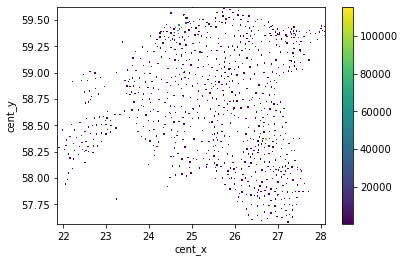

In [67]:
print(type(nodes))
nodes.plot()

In [84]:
def normalize(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

com_poi['x'] = normalize(com_poi['cent_x'].values)
com_poi['y'] = normalize(com_poi['cent_y'].values)

In [85]:
edges = connect_edges(com_poi, routes)

In [86]:
print(len(edges))
print(type(edges))
edges.head(5)

69861
<class 'pandas.core.frame.DataFrame'>


x         y
0  0.687364  0.254563
1  0.687364  0.254563
2       NaN       NaN
3  0.687364  0.254563
4  0.729455  0.323409

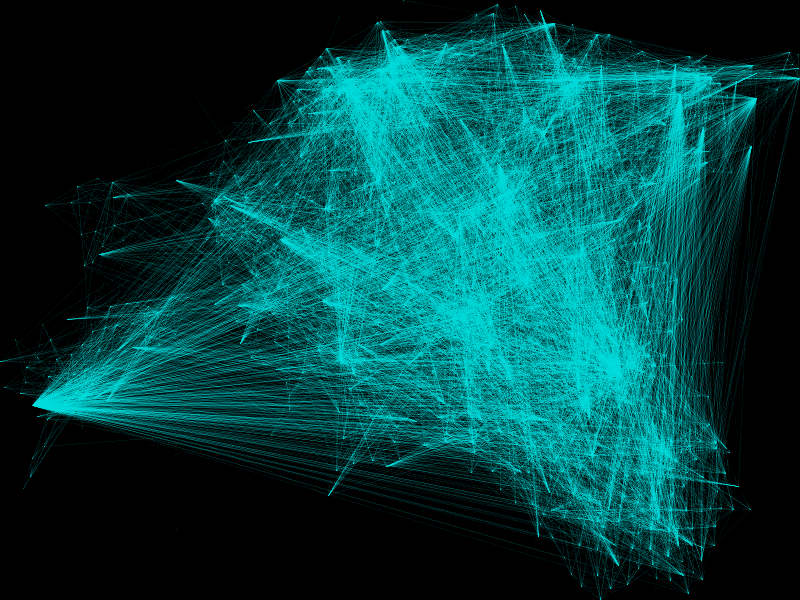

In [119]:
cvs = ds.Canvas(plot_width=800, plot_height=600)

agg = cvs.line(edges, 'x', 'y', ds.count())

# Valid strings are ‘eq_hist’ [default], ‘cbrt’ (cube root), ‘log’ (logarithmic), and ‘linear’.
shaded = tf.shade(agg, cmap=cm(['black', 'cyan'], False), how='eq_hist', alpha=220, min_alpha=50)

# img_dyn = tf.spread(shaded, px=2, how='add')
img_dyn3 = tf.dynspread(shaded, threshold=0.5, max_px=50, how='add')

img = tf.set_background(img_dyn3, background)

img



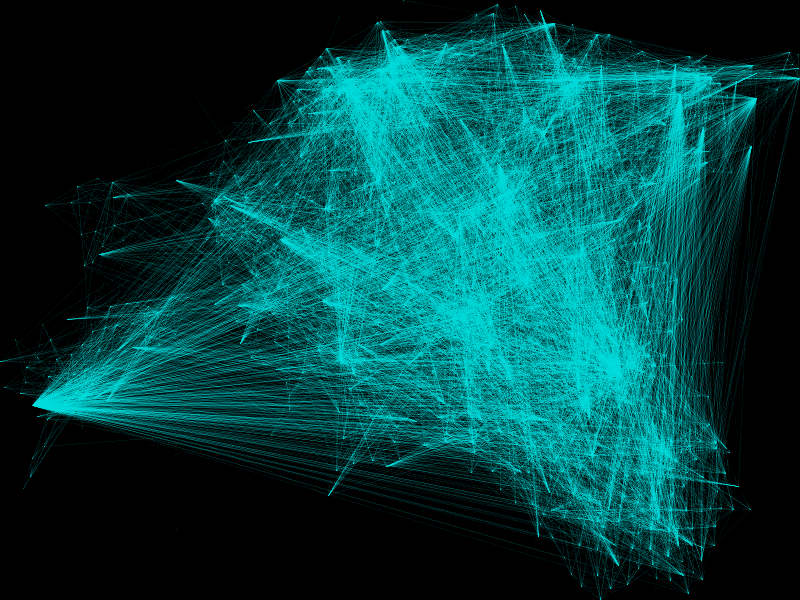

In [121]:
export(img,'../source/_static/day-22-movement')